# Project Summary
This EDA notebook dives into Acme Co.’s 2021–20205 USA sales dataset through:

Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

# Problem Statement
XYZ Co's 2021-2025 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

# Objective
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit  
- Uncover seasonal trends and anomalies for optimized planning  
- Spot pricing and margin risks from outlier transactions  
- Inform pricing, promotion, and market-expansion strategies  

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

# Setup & Configuration

In [1]:
# install libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Ingestion

In [4]:
# read_excel
sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name = None)

In [5]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2025 Budgets']

# Data Profiling/Initial Inspection

In [6]:
df_sales.shape

(64104, 12)

In [7]:
print(f"df_sales shape: ",(df_sales.shape))
print(f"df_customers shape: ",(df_customers.shape))
print(f"df_products shape: ",(df_products.shape))
print(f"df_regions shape: ",(df_regions.shape))
print(f"df_state_reg shape: ",(df_state_reg.shape))
print(f"df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [8]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [9]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [10]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [11]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [12]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [13]:
# A new header
# new_header = df_state_reg.iloc[0]
# df_state_reg.columns = new_header
# df_state_reg = df_state_reg[1:]

df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [14]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [15]:
df_budgets.rename(columns = {
    "2017 Budgets":"2025 Budgets"}, inplace=True)
df_budgets.head(5)

,Product Name,2025 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [16]:
# Check null values
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [17]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [18]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [19]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [20]:
df_state_reg.isnull().sum()

Column1    0
Column2    0
Column3    0
dtype: int64

In [21]:
df_budgets.isnull().sum()

Product Name    0
2025 Budgets    0
dtype: int64

## Data Cleaning and Wrangling

In [22]:
# Merge with customers
df = df_sales.merge(
    df_customers, how = 'left',
    left_on ='Customer Name Index',
    right_on = 'Customer Index'
)

In [23]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [24]:
# Merge with Products

df = df.merge(
    df_products, how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [26]:
# Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [27]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [28]:
# Step 1: Take first row as header
new_header = df_state_reg.iloc[0]

# Step 2: Assign new header
df_state_reg.columns = new_header   # inplace is not needed/allowed

# Step 3: Drop the first row
df_state_reg = df_state_reg[1:]     # no inplace available here

# Step 4: Reset the index properly
df_state_reg.reset_index(drop=True, inplace=True)

# Step 5: View
df_state_reg.head()


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [29]:
# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [30]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [31]:
# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [32]:
df.to_csv('file1.csv')

In [33]:
import os

In [34]:
os.getcwd()

'C:\\Users\\mukes\\OneDrive\\Desktop\\learning\\projects\\projects\\sales analysis\\Sales_analysis'

In [35]:
# Customer Index    Index    id     State Code


# Clean up redundant column
cols_to_drop = ['Customer Index','Index','id','State Code']
df = df.drop(columns = cols_to_drop,errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2025 Budgets
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [36]:
# Convert all columns to lower case for consistency and easier acesss

df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2025 budgets'], dtype=object)

In [37]:
# KEEP THE IMPORTANT COLUMNS AND DELETE THE COLUMNS THAT WE DON'T NEED

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2025 budgets'
]    

In [38]:
df=df[cols_to_keep]
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2025 budgets
0,SO - 000225,2021-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [39]:
# Changing the date to deltatime (type conversion)
df['orderdate']=pd.to_datetime(df['orderdate'],errors='coerce')
df['orderdate'].dtype

dtype('<M8[ns]')

In [40]:
# Rename the column
df = df.rename(columns = {
    "2025 budgets":"budgets"
})
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [41]:
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [42]:
df=df.rename(columns={
    'ordernumber':	'order_number',
    'orderdate':'order_date',
    'customer names':'customer_names',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'total_unit_cost',
})
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [43]:
# Blank out Budgets for non-2024 order
df.loc[df['order_date'].dt.year != 2024,'budgets'] = pd.NA
df.head()

# line total is revenue
df[['order_date','product_name','revenue','budgets']].tail()

,order_date,product_name,revenue,budgets
64099,2025-02-28,Product 26,21788.4,NaN
64100,2025-02-28,Product 21,5185.8,NaN
64101,2025-02-28,Product 13,43483.0,NaN
64102,2025-02-28,Product 20,27717.9,NaN
64103,2025-02-28,Product 15,7986.4,NaN


In [44]:
# Filter the dataset to iclude only records from year 2024
df_2024 = df[df['order_date'].dt.year == 2024]


In [45]:
df.isnull().sum()

order_number           0
order_date            36
customer_names         0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total_unit_cost        0
state_code             0
county                 0
state                  0
region                 0
latitude               0
longitude              0
budgets            48841
dtype: int64

In [49]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,0.0027
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,0.0046
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,0.0030
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,0.0056
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,0.0045


In [49]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,0.0027
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,0.0046
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,0.0030
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,0.0056
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,0.0045


# Feature Engineering

In [47]:
df['total_cost'] = df['order_quantity']*df['total_unit_cost']

df['profit'] = df['revenue']- df['total_cost']

df['profit_margin_pct'] =df['profit'] /df['revenue']/100

In [48]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,0.0027
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,0.0046
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,0.0030
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,0.0056
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,0.0045


# Exploratory Analysis (EDA)

## 1. *Monthly Sales Trend Over Time*

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

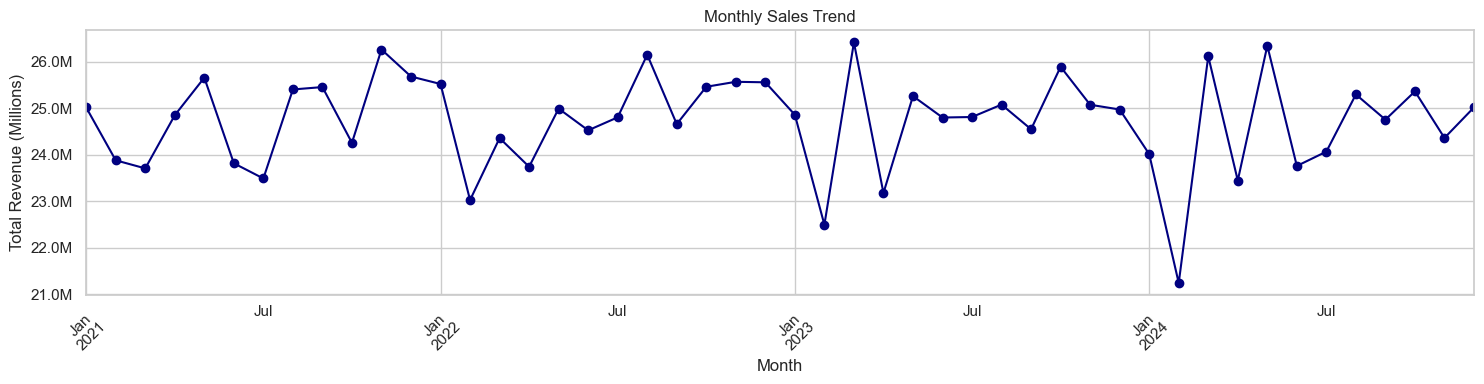

In [222]:
df['order_month'] = df['order_date'].dt.to_period('M') #-- another column added called "Order_month'

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2. *Monthly Sales Trend (All Years Combined)*

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

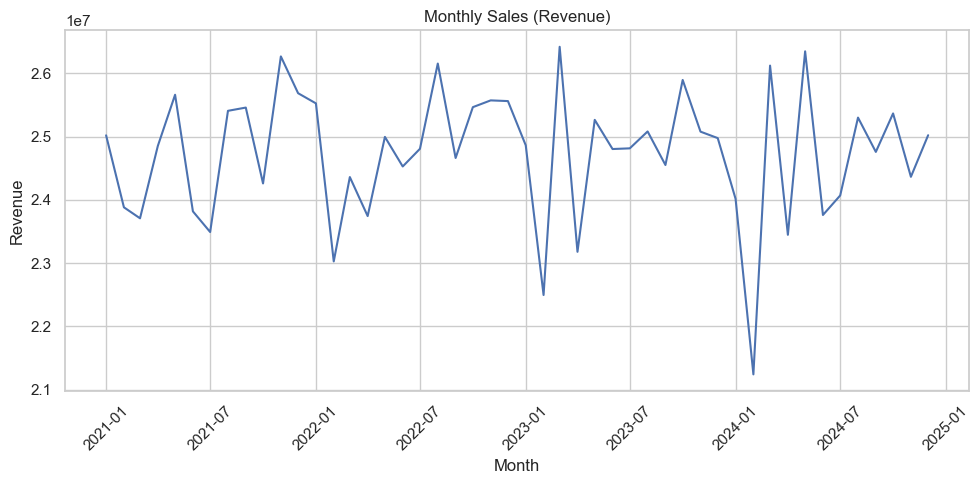

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure order date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 2) If revenue isn't already present, uncomment this to compute it
# df['revenue'] = df['order quantity'] * df['unit price']

# 3) Monthly aggregation (Month Start frequency)
monthly_sales = (
    df.groupby(pd.Grouper(key='order_date', freq='MS'))['revenue']
      .sum()
      .reset_index()
      .sort_values('order_date')
)

# 4) Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['order_date'], monthly_sales['revenue'])
plt.title('Monthly Sales (Revenue)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [177]:
# Convert to datetime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Remove all records from 2025-01 and 2025-02
mask = (df['order_date'] >= '2025-01-01') & (df['order_date'] < '2025-03-01')
df = df[~mask]


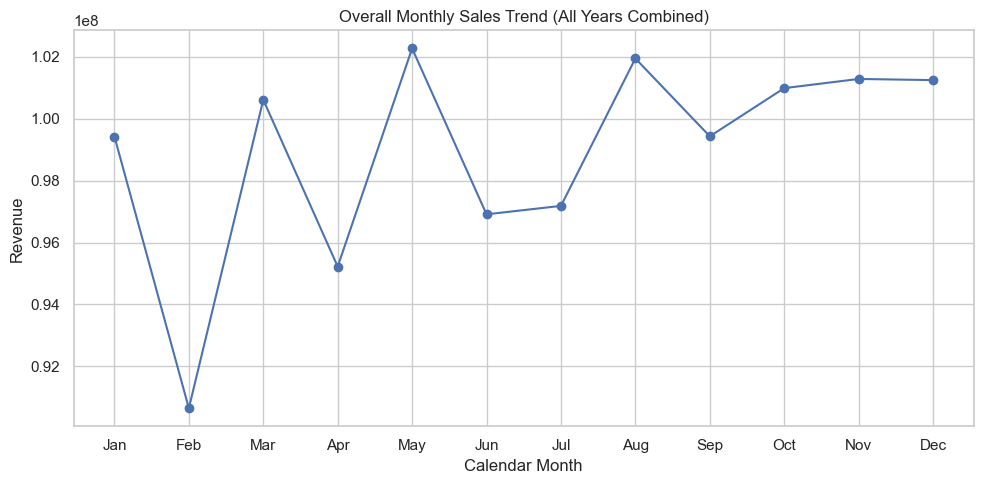

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure df is a copy, not a slice
df = df.copy()

# 1) Convert to datetime
df.loc[:, 'order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# 2) Add month features
df.loc[:, 'month_num'] = df['order_date'].dt.month
df.loc[:, 'month_lbl'] = df['order_date'].dt.month_name().str[:3]

# 3) Group by month across all years
seasonality_sum = (
    df.groupby(['month_num', 'month_lbl'], as_index=False)['revenue']
      .sum()
      .sort_values('month_num')
)

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(seasonality_sum['month_lbl'], seasonality_sum['revenue'], marker='o')
plt.title('Overall Monthly Sales Trend (All Years Combined)')
plt.xlabel('Calendar Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()




### INSIGHTS ---

Across all years, January begins strong with roughly \$99 M, followed by a steep decline through April’s low point (≈\$95 M).

Sales rebound in May and August (≈\$102 M) before settling into a plateau of \$99–101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.



## 🔹 3. *Top 10 Products by Revenue (in Millions)*

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

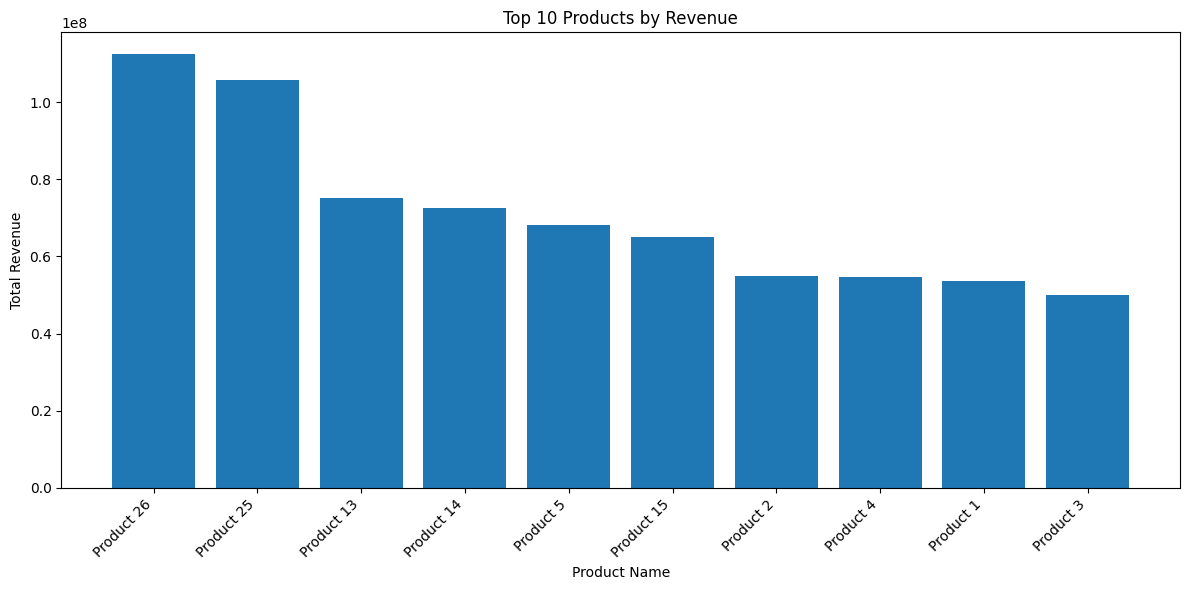

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Group by product_name and sum the revenue
top_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# 2) Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_products['product_name'], top_products['revenue'])

plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # rotate for readability

plt.tight_layout()
plt.show()


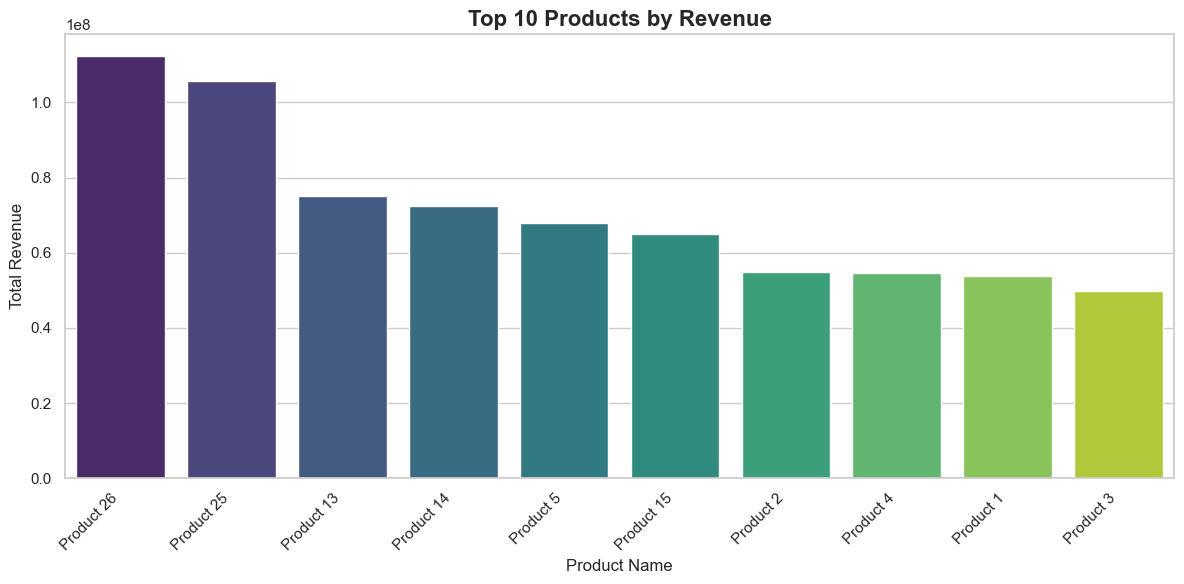

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply seaborn theme (this gives the "seaborn effect")
sns.set_theme(style="whitegrid")   # or "darkgrid", "white", "ticks"

# Make a safe copy to avoid warnings
df = df.copy()

# 1) Aggregate revenue by product
top_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# 2) Plot using seaborn
plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_products,
    x='product_name',
    y='revenue',
    hue='product_name',       # Add hue for seaborn palette effect
    palette='viridis',        # You can try: 'magma', 'cubehelix', 'rocket'
    dodge=False,              # Prevent multiple bars per category
    legend=False              # Hide legend (we don't need it)
)

# Titles and labels
plt.title('Top 10 Products by Revenue', fontsize=16, weight='bold')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### INSIGHTS ---
Products 26 and 25 pull away at \$118 M and \$110 M, with a sharp drop to \$78 M for Product 13 and a tight mid-pack at \$68–\$75 M.  

The bottom four cluster at \$52–\$57 M, highlighting similar constraints.  

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.  

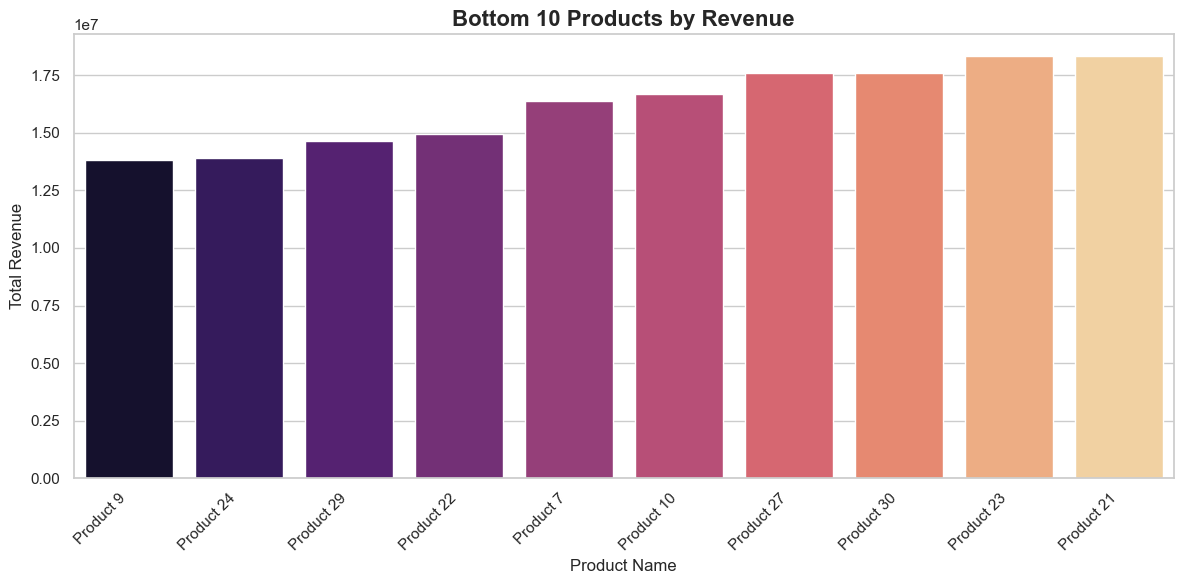

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a safe copy
df = df.copy()

# 1) Aggregate revenue by product
bottom_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=True)   # ascending = lowest first
      .head(10)
      .reset_index()
)

# 2) Apply seaborn theme
sns.set_theme(style="whitegrid")

# 3) Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=bottom_products,
    x='product_name',
    y='revenue',
    hue='product_name',     # apply seaborn palette effect
    palette='magma',        # nice gradient palette
    dodge=False,
    legend=False
)

# Titles and labels
plt.title('Bottom 10 Products by Revenue', fontsize=16, weight='bold')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 🔹 5. *Sales by Channel (Pie Chart)*

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

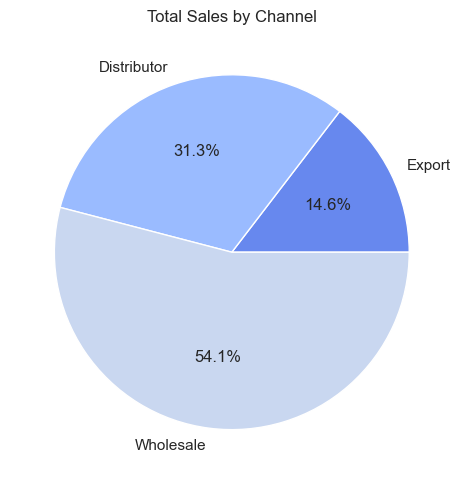

In [196]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title("Total Sales by Channel")

plt.tight_layout()
plt.show()
               

### INSIGHTS ---
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.  

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.  


##  6. *Average Order Value (AOV) Distribution*

Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

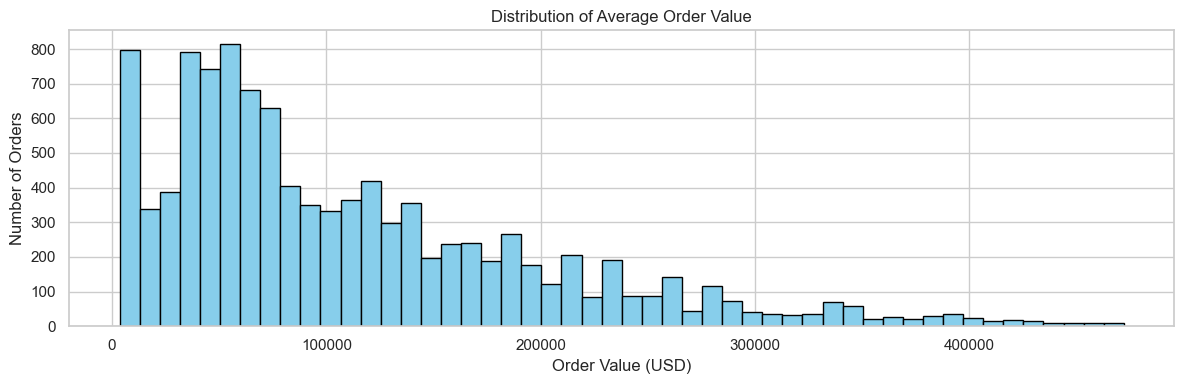

In [200]:
aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between \$20 K and \$120 K and a pronounced mode around \$50 K–\$60 K.  

A long tail of high-value transactions extends up toward \$400 K–\$500 K, but these large orders represent only a small share of total volume.  

## 7. *Profit Margin % vs. Unit Price*

Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

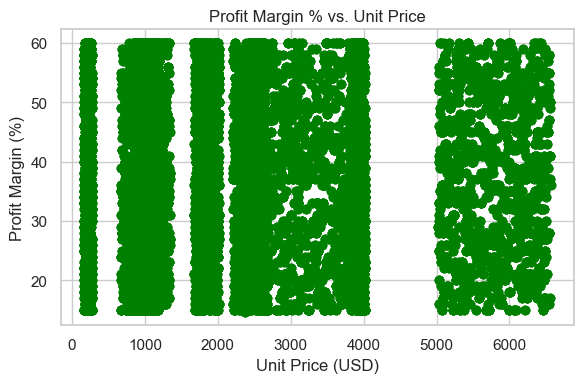

In [230]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS ---

Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near \$0 to over \$6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.


##  8. *Unit Price Distribution per Product*

Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

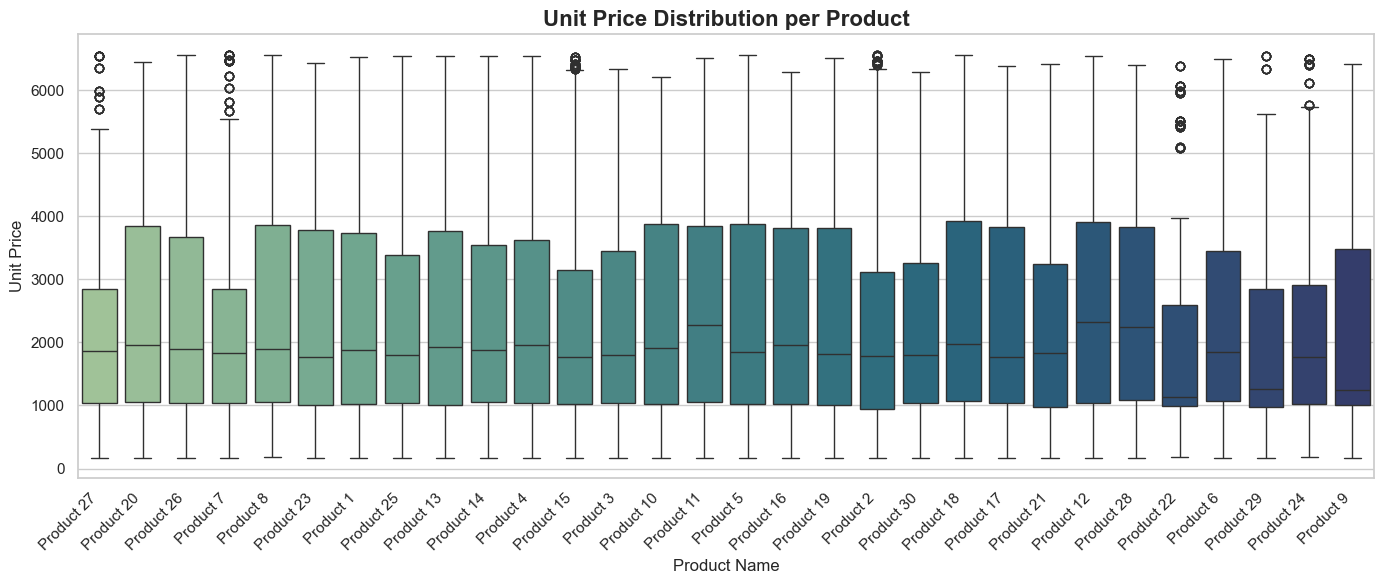

Palette used: crest


In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set_theme(style="whitegrid")

# List of palettes to rotate
palettes = [
    "magma", "rocket", "crest", "flare", "icefire",
    "viridis", "cubehelix", "Spectral", "coolwarm", "turbo"
]

# Randomly choose a palette for each plot
chosen_palette = random.choice(palettes)

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    hue='product_name',
    palette=chosen_palette,   # dynamic palette
    dodge=False,
    legend=False
)

plt.title('Unit Price Distribution per Product', fontsize=16, weight='bold')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Palette used:", chosen_palette)


### INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.  

In contrast, deep low-end outliers (near \$0–\$100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.  

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.  

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.


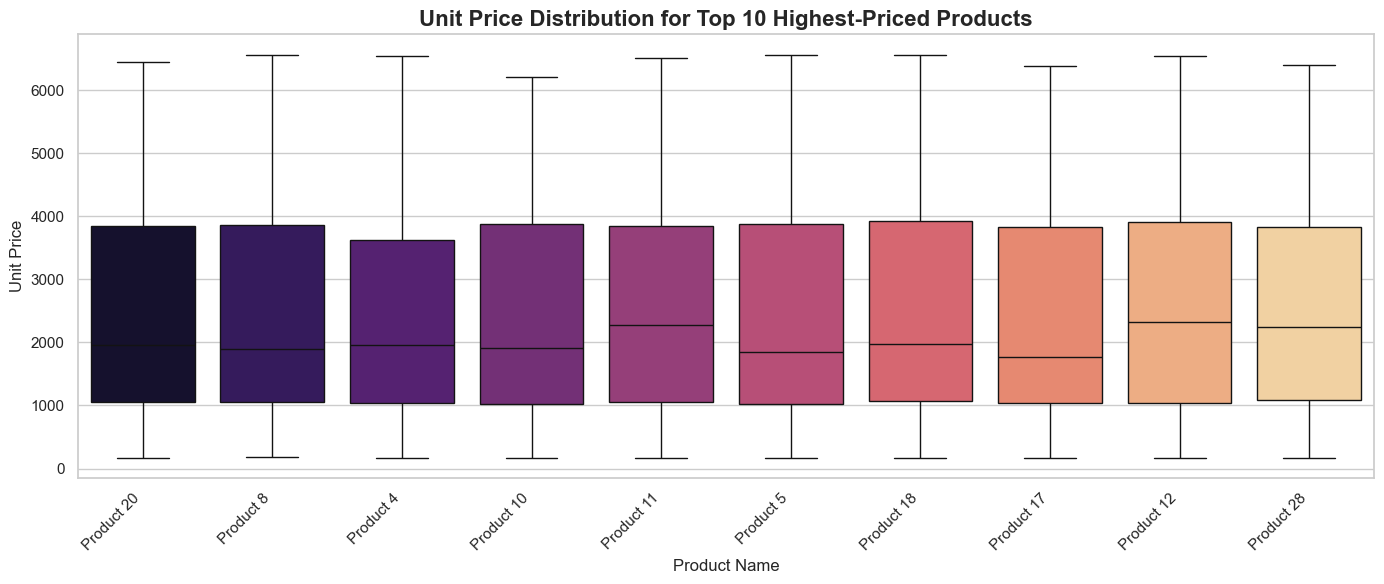

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# 1) Calculate average unit price per product
top10_price_products = (
    df.groupby('product_name')['unit_price']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# 2) Filter dataframe for only these top 10 products
df_top10 = df[df['product_name'].isin(top10_price_products)].copy()

# 3) Choose a modern palette
palette_choice = "magma"     # you can change per your question

# 4) Plot unit price distribution using seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_top10,
    x='product_name',
    y='unit_price',
    hue='product_name',
    palette=palette_choice,
    dodge=False,
    legend=False
)

plt.title('Unit Price Distribution for Top 10 Highest-Priced Products', fontsize=16, weight='bold')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 🔹 9. *Total Sales by US Region*

**Goal:** Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

**Chart:** Horizontal bar chart

**EDA Type:** Univariate comparison

**Structure:**  
- Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking  
- X‑axis in millions USD, Y‑axis listing regions  


C:\Users\mukes\AppData\Local\Temp\ipykernel_21948\3711124858.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


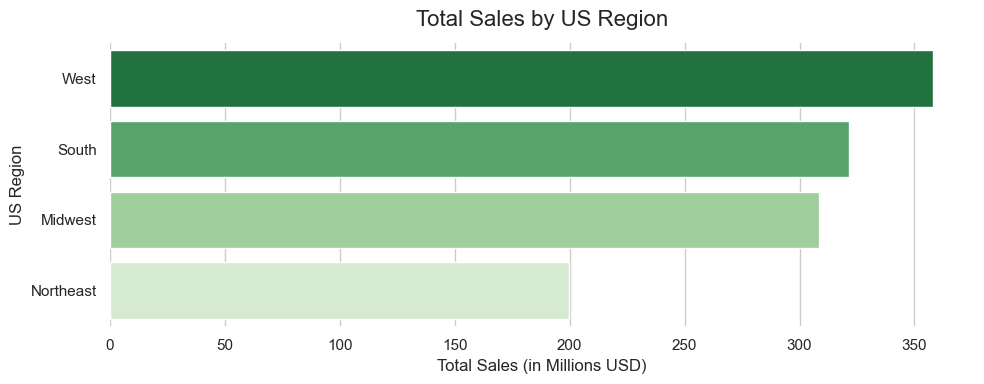

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### INSIGHTS —  
- **West dominates** with roughly \$360 M in sales (~35 % of total), underscoring its market leadership.  
- **South & Midwest** each contribute over \$320 M (~32 %), indicating strong, consistent demand across central regions.  
- **Northeast trails** at about \$210 M (~20 %), signaling room for growth and targeted investment.  
- **Action:** Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.  


## 🔹 11. *Top 10 States by Revenue and Order Count*

Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

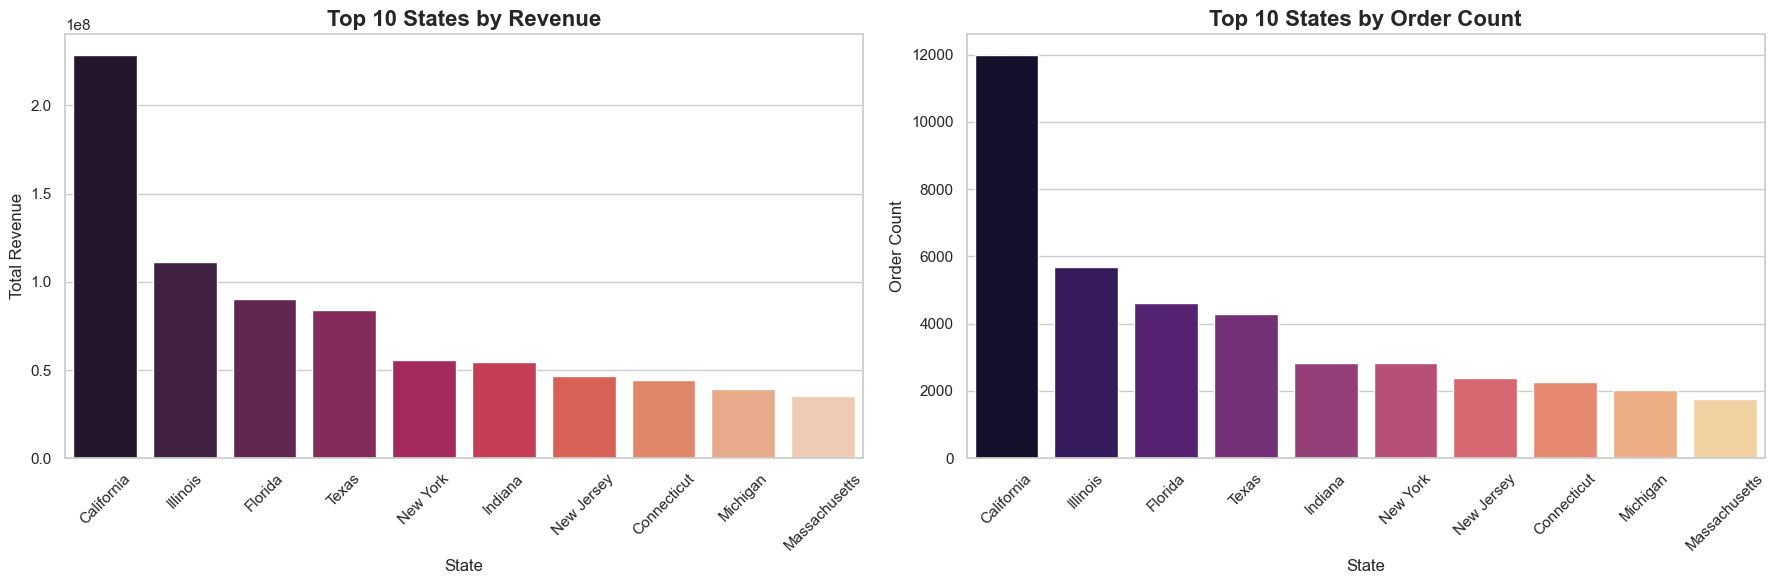

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Make safe copy
df = df.copy()

# --- TOP 10 STATES BY REVENUE ---
top10_states_revenue = (
    df.groupby('state')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# --- TOP 10 STATES BY ORDER COUNT ---
top10_states_orders = (
    df.groupby('state')['order_number']
      .count()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# --- Create combined plot ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1 - Revenue (fix palette warning)
sns.barplot(
    data=top10_states_revenue,
    x='state',
    y='revenue',
    hue='state',           # <--- FIX added
    palette='rocket',
    dodge=False,
    legend=False,
    ax=axes[0]
)

axes[0].set_title('Top 10 States by Revenue', fontsize=16, weight='bold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2 - Order Count (fix palette warning)
sns.barplot(
    data=top10_states_orders,
    x='state',
    y='order_number',
    hue='state',           # <--- FIX added
    palette='magma',
    dodge=False,
    legend=False,
    ax=axes[1]
)

axes[1].set_title('Top 10 States by Order Count', fontsize=16, weight='bold')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Order Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### INSIGHTS ---
- Aibox Company tops the list with \$12.5 M, followed closely by State Ltd (\$12.2 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.1 M, down to BB17 Company at \$4.1 M—roughly half the top customer’s revenue.

- This steep drop from ~\$10 M+ to \$4–5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


## 12. *Average Profit Margin by Channel*

Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

C:\Users\mukes\AppData\Local\Temp\ipykernel_21948\1084226506.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


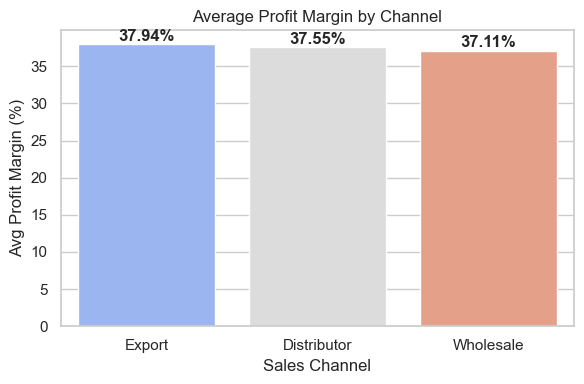

In [237]:
#  Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# Set the figure size for clarity
plt.figure(figsize=(6, 4))

#  Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

#  Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

#  Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

#  Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

### INSIGHTS ---
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).  

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.  

This uniformity implies well-controlled costs and pricing power everywhere.  

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.  

## 13. *Top and Bottom 10 Customers by Revenue*

Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

In [52]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,0.0027
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,0.0046
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,0.0030
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,0.0056
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,0.0045


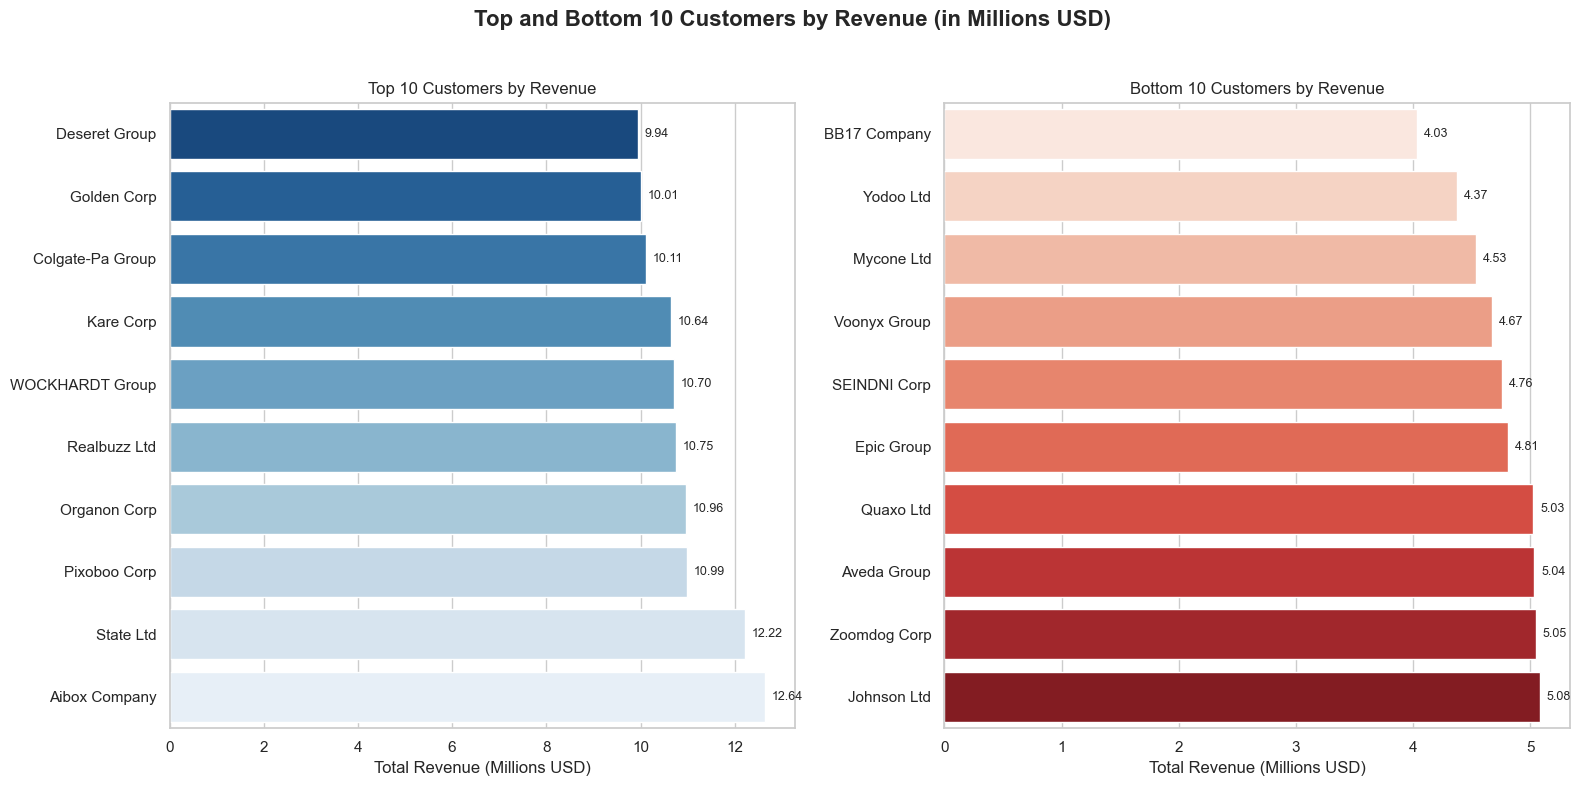

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure revenue numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Aggregate revenue by customer
customer_revenue = (
    df.groupby('customer_names', as_index=False)['revenue']
      .sum()
      .sort_values(by='revenue', ascending=False)
)

# Top10 and Bottom10 as copies (prevents SettingWithCopyWarning)
top10_customers = customer_revenue.head(10).copy()
bottom10_customers = customer_revenue.tail(10).copy()

# Add revenue in millions using .loc to avoid chained-assignment
top10_customers.loc[:, 'revenue_million'] = top10_customers['revenue'] / 1_000_000
bottom10_customers.loc[:, 'revenue_million'] = bottom10_customers['revenue'] / 1_000_000

# For nicer ordering in horizontal bars: keep the order as-is for top,
# but reverse bottom so smallest appears at top of chart
top10_customers = top10_customers.sort_values('revenue_million', ascending=True)   # for horizontal bar (small->top)
bottom10_customers = bottom10_customers.sort_values('revenue_million', ascending=True)

# Seaborn style
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

# Prepare a palette with same length as rows (optional)
palette_top = sns.color_palette("Blues_r", n_colors=len(top10_customers))
palette_bot = sns.color_palette("Reds", n_colors=len(bottom10_customers))

# --- Left: Top 10 Customers (horizontal) ---
sns.barplot(
    data=top10_customers,
    x='revenue_million',
    y='customer_names',
    hue='customer_names',         # specify hue to satisfy upcoming seaborn API change
    dodge=False,
    palette=palette_top,
    ax=axes[0]
)
# remove legend created by hue
if axes[0].get_legend() is not None:
    axes[0].get_legend().remove()

axes[0].set_title("Top 10 Customers by Revenue")
axes[0].set_xlabel("Total Revenue (Millions USD)")
axes[0].set_ylabel("")
# display values at end of bars
for p in axes[0].patches:
    width = p.get_width()
    axes[0].annotate(f"{width:,.2f}",
                     (width, p.get_y() + p.get_height() / 2),
                     xytext=(5, 0),
                     textcoords="offset points",
                     va="center", fontsize=9)

# --- Right: Bottom 10 Customers (horizontal) ---
sns.barplot(
    data=bottom10_customers,
    x='revenue_million',
    y='customer_names',
    hue='customer_names',         # specify hue to satisfy upcoming seaborn API change
    dodge=False,
    palette=palette_bot,
    ax=axes[1]
)
if axes[1].get_legend() is not None:
    axes[1].get_legend().remove()

axes[1].set_title("Bottom 10 Customers by Revenue")
axes[1].set_xlabel("Total Revenue (Millions USD)")
axes[1].set_ylabel("")

for p in axes[1].patches:
    width = p.get_width()
    axes[1].annotate(f"{width:,.2f}",
                     (width, p.get_y() + p.get_height() / 2),
                     xytext=(5, 0),
                     textcoords="offset points",
                     va="center", fontsize=9)

plt.suptitle("Top and Bottom 10 Customers by Revenue (in Millions USD)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 14. *Correlation Heatmap of Numeric Features*

Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

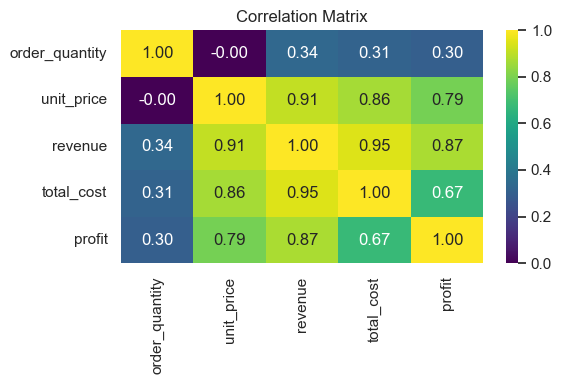

In [241]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### INSIGHTS ---
- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  


## Customer Segmentation: Revenue vs. Profit Margin


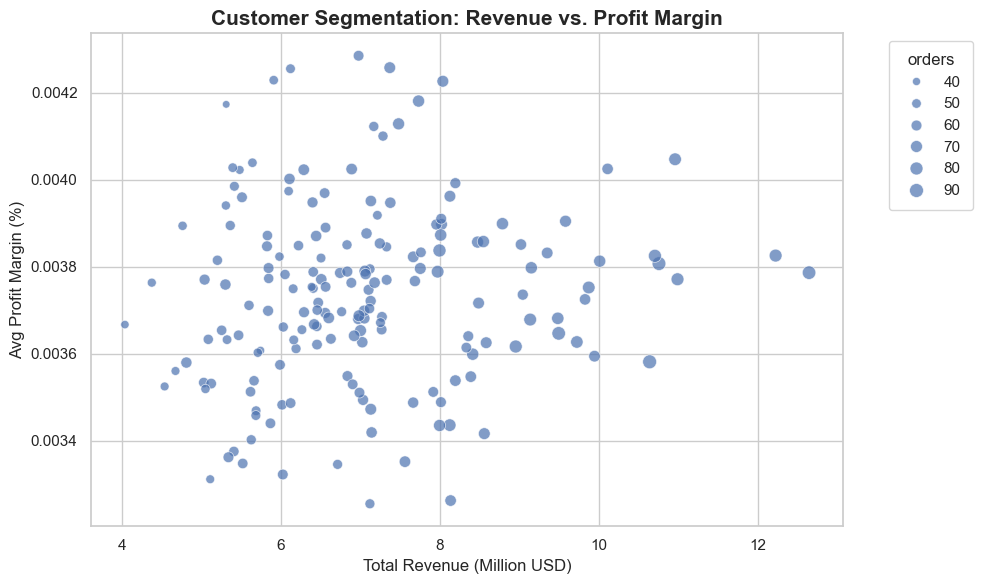

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert numeric columns
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')

# 1️⃣ Aggregate metrics per customer
customer_segmentation = (
    df.groupby('customer_names', as_index=False)
      .agg(
          total_revenue=('revenue', 'sum'),
          avg_profit_margin=('profit_margin_pct', 'mean'),
          orders=('order_number', 'nunique')
      )
)

# Convert revenue to millions for readability
customer_segmentation['total_revenue_million'] = customer_segmentation['total_revenue'] / 1_000_000

# 2️⃣ Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

bubble = sns.scatterplot(
    data=customer_segmentation,
    x='total_revenue_million',
    y='avg_profit_margin',
    size='orders',
    sizes=(30, 100),     # Compact bubble size
    alpha=0.7,
    legend='brief'       # 👈 shows small circle legend like your image
)

# 3️⃣ Legend customization — make it look clean like your example
handles, labels = bubble.get_legend_handles_labels()

# Keep only the 'orders' legend (ignore unwanted labels)
if 'orders' in labels:
    start = labels.index('orders')
    handles = handles[start:]
    labels = labels[start:]

plt.legend(
    handles,
    labels,
    title='orders',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderpad=0.8,
    frameon=True,
)

# 4️⃣ Chart styling
plt.title("Customer Segmentation: Revenue vs. Profit Margin", fontsize=15, fontweight='bold')
plt.xlabel("Total Revenue (Million USD)")
plt.ylabel("Avg Profit Margin (%)")
plt.tight_layout()
plt.show()



# **Saving Pre-Processed Dataframe**

In [242]:
df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,...,region,latitude,longitude,budgets,total_cost,profit,profit_margin_pct,order_month,month_num,month_lbl
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2021-01,1.0,Jan
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2021-01,1.0,Jan
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2021-01,1.0,Jan
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2021-01,1.0,Jan
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2021-01,1.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2024-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,...,Midwest,39.08547,-94.35210,3016489.209,4609.332,4254.768,48.0,2024-12,12.0,Dec
61622,SO - 0004785,2024-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,...,Northeast,39.95234,-75.16379,2642352.432,1085.400,1326.600,55.0,2024-12,12.0,Dec
61623,SO - 0004950,2024-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,...,South,29.13832,-80.99561,1672229.416,27889.353,6541.947,19.0,2024-12,12.0,Dec
61624,SO - 0006829,2024-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,...,Northeast,41.22509,-73.06111,1672229.416,4864.870,4314.130,47.0,2024-12,12.0,Dec


In [243]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# Key Insights

# Recommendations